# Assignment-1 EE 769
## Linear Regression
### Name: Vaishnav V. Rao
### Roll: 190260045

In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

## (1): Function to generate data matrix X
- Inputs: Number of samples, feature dimension
- Outputs: Data matrix X
- np.random.randn will be used to generate a random matrix sampled from a normal distribution
- Rows of X: different samples
- Columns of X: dimension of each sample

In [45]:
#Function for generating the data matrix
def data_matrix(samples, dim, rand_seed):
    np.random.seed(rand_seed) #to generate determined psuedo random numbers
    X= np.random.randn(samples,dim)
    #data matrix: rows=number of samples, columns=dimensions of feautures
    #random matrix generated
    return X
    

#Test the function
samples= input('Enter sample size:')
dim= input('Enter feature dimension:')
rand_seed=6
#User input

try: 
    samples=int(samples)
    dim=int(dim)
    #If float or strings are input, value error will send execution to 'except'

    X=data_matrix(samples, dim, rand_seed) #Call the data matrix function
    print('The generated data matrix is: \n', X) #prints the generated data matrix
    #If negative numbers are input, the function will raise a value error and proceed to except
        
except ValueError:
    #Whole numbers not entered
    print('Invalid input. Whole numbers expected') #Result

Enter sample size:100
Enter feature dimension:10
The generated data matrix is: 
 [[-3.11783673e-01  7.29003924e-01  2.17820788e-01 -8.99091797e-01
  -2.48678065e+00  9.13251521e-01  1.12706373e+00 -1.51409323e+00
   1.63929108e+00 -4.29893603e-01]
 [ 2.63128056e+00  6.01822250e-01 -3.35881615e-01  1.23773784e+00
   1.11128167e-01  1.29151248e-01  7.61276122e-02 -1.55128159e-01
   6.34225343e-01  8.10655003e-01]
 [ 3.54808609e-01  1.81259031e+00 -1.35647580e+00 -4.63631966e-01
   8.24653845e-01 -1.17643148e+00  1.56448966e+00  7.12705095e-01
  -1.81006598e-01  5.34199526e-01]
 [-5.86612960e-01 -1.48185327e+00  8.57247618e-01  9.43098987e-01
   1.14441434e-01 -2.19566836e-02 -2.12714455e+00 -8.34407468e-01
  -4.65508310e-01  2.33710591e-01]
 [ 1.38503523e+00 -5.19627087e-01 -7.80152139e-01  9.55609591e-01
  -1.26736378e-01 -1.36861282e+00  1.21848065e+00 -8.57501438e-01
  -5.61470876e-01 -1.03351990e+00]
 [ 3.58770956e-01  1.07368134e+00 -3.75504724e-01  3.96367573e-01
  -4.71446277e-01 

## (2): Function to generate target data
- Inputs: Data matrix X, weight vector for each column, bias w0, noise variance
- Outputs: Target vector t
- Noise will be sampled from a normal distribution (np.random.normal)

$$t= y + \epsilon $$
where
$$y = w_0 + X.w^T $$
and $\epsilon$ is a vector sampled from a normal distribution

In [46]:
#Function for generating the dependent variable
def target_data(X, w, w0, sigma):
    y= w0 + X.dot(w.T) #The expected output of polynomial function
    t= np.random.normal(y,sigma) #Adding gaussian noise to generate target data
    return t

#Test the function
np.random.seed(4)
w0= np.random.randn()

np.random.seed(5)
w= np.random.randn(dim)

np.random.seed(7)
sigma=np.random.random()
#generate random weights, bias, and variance

#print the generated values
print('The bias is:', w0)
print('The weights are:', w)
print('The standard deviation is:', sigma)

try:
    t= target_data(X, w, w0, sigma) #Call the function for generating target data. It's size should be = sample size
    print('The generated target data is: \n', t) #prints the generated data matrix
    
except:
    #If matrix dimensions or data types are incompatible
    print("Error in values or dimensions") #Result

The bias is: 0.05056170714293955
The weights are: [ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996]
The standard deviation is: 0.07630828937395717
The generated target data is: 
 [ 1.89645345  0.08583616 -7.39152538  4.61342197 -3.86030101  1.23976117
 -1.50448641  3.39786591 -3.56994136 -0.17390291 -0.1158425  -2.51179018
  1.09514758  2.51686063 -5.86376415  2.75346518  0.08481413  0.84276014
  1.81191988  2.58966152 -1.01701382 -2.10886086  1.7157815  -1.05634237
  1.90617187  4.11928559  1.66968217  1.43475173 -1.1680617   2.87295076
  0.59915217  0.68881638 -1.98011734  7.23999425 -1.09067535  3.76252704
  4.98073778 -1.55422795 -0.69437795 -4.5306068   3.64138775  0.23610851
  0.61360389 -1.44499822  2.99947601  2.60444446 -4.2906174  -0.29657786
 -2.2819129  -2.59733934  1.1971193   1.18832347  3.32558413  0.87860654
  0.88561289 -1.62847859  1.5575391  -2.45726852 -5.09981105  0.67077055
 -0.7391835  -2.68

## (3): Function to compute linear regression
- Inputs: data matrix X and weight vector w
- Outputs: y

$$y= w_0 + X.w^T$$

In [47]:
#Function for computing the linear regression
def lin_reg(X, w, w0):
    y= w0 + X.dot(w.T) #The expected output of polynomial function
    return y
    
#Test the function
try:
    y= lin_reg(X, w, w0) #Call the function for computing the linear regression. It's size should be = sample size
    print('The linear regression is: \n', y) #prints the linear regression
except:
    #If matrix dimensions or data types are incompatible
    print("Error in values or dimensions")  #Result  

The linear regression is: 
 [ 1.92091813e+00 -2.53513715e-02 -7.39863472e+00  4.36916564e+00
 -3.84832147e+00  1.26190060e+00 -1.65906957e+00  3.39796725e+00
 -3.53354751e+00 -2.66749673e-01 -1.03394175e-01 -2.48628509e+00
  1.09628978e+00  2.51522834e+00 -5.92090235e+00  2.75980913e+00
  7.94169072e-02  8.68262389e-01  1.74523453e+00  2.58175797e+00
 -1.02240581e+00 -2.02437863e+00  1.65517863e+00 -1.14613151e+00
  2.01569914e+00  4.13125215e+00  1.84739221e+00  1.44761064e+00
 -9.96342507e-01  2.90188720e+00  5.62751909e-01  6.43030349e-01
 -2.03329735e+00  7.37619693e+00 -1.06287590e+00  3.89454783e+00
  4.87838544e+00 -1.45862401e+00 -6.41971797e-01 -4.36451305e+00
  3.69015758e+00  1.13172924e-01  6.52171244e-01 -1.56479469e+00
  2.85386747e+00  2.68413637e+00 -4.09646208e+00 -3.48829663e-01
 -2.29829300e+00 -2.73822317e+00  1.18442150e+00  1.18285480e+00
  3.35196523e+00  8.67808196e-01  8.24049096e-01 -1.50138973e+00
  1.46400770e+00 -2.44968799e+00 -5.06959065e+00  7.29055692e-

## (4): Function to compute mean square error between two vectors
- Inputs: vectors of same dimension: y and t
- Outputs: Mean square error (MSE)

$$MSE= \frac{1}{N}\sum_i^N (y_i-t_i)^2$$
where $N$ is the number of samples

In [48]:
#Function for computing mean square error (MSE)
def MSE(y,t):
    mse= np.mean((y-t)**2)
    return mse

#Test the function
try:
    mse= MSE(y,t) #Call the function to compute mean square error
    print('The mean square error is: \n', mse) #prints the mean square error
except:
    #Dimensions incompatible
    print("Dimensions of target data and expected data do not match") #Result

The mean square error is: 
 0.007445765706111074


## (5): Function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization 
- Inputs:  X, t, and lambda
- Outputs: w(including bias), MSE, y

Maximum likelihood weights:
$$w_{ML}= (\lambda \mathbb{I} +\Phi^T\Phi)^{-1}\Phi^T t$$
where $\Phi$ is the data matrix X with an extra column of ones as the first column

In [49]:
#Function for estimating the weights of linear regression using pseudo-inverse, assuming L2 regularization
def optimal_weight(X, t, Lambda):
    
    Phi= np.c_[np.ones(len(t)), X] #adds a column of ones as first column (phi_0 - this is the term that gets the weight w0)
    w_ml= np.linalg.inv(Lambda*np.identity(dim+1) + Phi.T.dot(Phi)).dot(Phi.T).dot(t) #calculating optimal weights
    
    y=lin_reg(X, w_ml[1:], w_ml[0]) #call the function to calculate liear regression estimate using most likely weights
    mse= MSE(y,t) #call the function to calculate loss using the above estimate and target data
    
    return w_ml, y, mse  #Return maximum likelihood weights, the estimated linear regression for those weights, and mean square error

#Test the function
try:
    Lambda=0.2 #Set an L2 penalty factor >=0
    w_ml, y_ml, mse_ml = optimal_weight(X,t,Lambda)
    print('The estimated maximaum likelihood weights are (1st term is bias): \n', w_ml) #Prints the maximum likelihood weights
    print('The linear regression is: \n', y_ml) #prints the linear regression
    print('The mean square error is: \n', mse_ml) #prints the mean square error
except:
    #Value error
    print("Error in values or dimensions")  

The estimated maximaum likelihood weights are (1st term is bias): 
 [ 0.04551997  0.42887718 -0.33212392  2.43319013 -0.23432218  0.1006145
  1.58096664 -0.90619397 -0.58470268  0.18660359 -0.33152294]
The linear regression is: 
 [ 1.91634717 -0.0464763  -7.41849393  4.37889298 -3.85148453  1.25627453
 -1.66243335  3.40305553 -3.53657136 -0.28291654 -0.09076447 -2.51613013
  1.08352476  2.51072485 -5.92725536  2.78654543  0.06408676  0.85273201
  1.71504509  2.56684434 -1.00163238 -2.01308146  1.61855109 -1.16819014
  2.00219095  4.14623561  1.80295643  1.4489437  -1.00743908  2.85033703
  0.58942374  0.64866033 -2.02039456  7.37504755 -1.06539828  3.82569494
  4.91343063 -1.4467064  -0.66395909 -4.35047278  3.67690682  0.13805414
  0.68260397 -1.55377181  2.8700383   2.66765519 -4.09442607 -0.3399636
 -2.31722534 -2.7120358   1.1373155   1.17001867  3.3339498   0.84490791
  0.82797844 -1.52998054  1.4739713  -2.44861696 -5.06627859  0.75314679
 -0.82030242 -2.70344281  2.96884217  6.1

## (6): Function to compute the gradient of MSE with respect to its weight vector.
- Inputs: X matrix, t vector, and w vector
- Outputs: gradient vector

Gradient of MSE:
$$\nabla MSE= \frac{2}{N}\sum_i^N(t_i- w^Tx_i)x_i^T$$

In [50]:
#function to compute gradient of MSE with respect to weight vector (including the bias)
def grad_MSE(X, t, w, w0):
    w_new= np.r_[w0,w] #adds the bias term as the zeroth term of weight vector
    Phi= np.c_[np.ones(len(t)), X] #adds a column of ones as first column (phi_0 - this is the term that gets the weight w0) to the data matrix
    
    diff= Phi.dot(w_new.T)-t  #error term = y-t
    grad_mse= 2*np.mean((Phi.T*diff).T, axis=0) #computes the gradient of MSE using matrix operations
    return grad_mse #return computed vector

#Test the function
try:
    grad_mse= grad_MSE(X, t, w, w0) #Call the function to compute the gradient of mean square error evaluated for a particular weight vector
    print('The gradient vector is: \n', grad_mse) #prints the gradient vector
except:
    #Value error
    print("Error in values or dimensions")

The gradient vector is: 
 [ 0.00775163  0.01323981  0.00233049 -0.02151113 -0.02822148  0.00724859
  0.00336655 -0.00093741 -0.00699793 -0.00615968  0.00688501]


## (7): Function to compute L2 norm of a vector w (squared) passed as a numpy array excluding bias
- Inputs: w vector
- Outputs: L2 norm

L2 norm:
$$||w||_{L2}= \sum_i^N w_i^2$$

In [51]:
#function to compute L2 norm of a vector
def L2_norm(w):
    l2_norm= np.sum(w**2) #L2 norm (squared): sum of squares of components of the vector
    return l2_norm  #return the L2 norm

#Test the function
try:
    #we will use the already randomly generated weight vector 'w' to test the L2 norm
    l2_norm= L2_norm(w) #Call the function to compute the L2 (squared) norm of a vector
    print('The L2 norm of \n', w, '\n is \n', l2_norm) #prints the L2 norm
except:
    #Value error
    print("Error in values or dimensions")

The L2 norm of 
 [ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996] 
 is 
 10.113363221656943


## (8): Function to compute the gradient of L2 norm with respect to the weight vectors.
- Inputs: w vector
- Outputs: gradient of L2 norm

Gradient of L2 norm:
$$\nabla ||w||_{L2}= 2w$$

Gradient with respect to the bias term will be set to zero and a vector of dimension 'dim+1' will be returned with first term zero

In [52]:
#function to compute the gradient of (square of) L2 norm wrt weight vectors
def grad_L2(w):
    grad_l2= np.r_[[0],2*w] #compute the gradient of (square of) L2 norm, 1st element- gradient wrt w0=0 (as intercept is held constant)
    return grad_l2 #return computed vector

#Test the function
try:
    #we will use the already randomly generated weight vector 'w' to test the function
    grad_l2= grad_L2(w) #Call the function to compute the gradient of (square of) L2 norm of a vector
    print('The gradient of L2 norm evaluated at', np.r_[w0,w], '\n is \n', grad_l2, '\n where the bias is held constant') #prints the L2 norm
except:
    #Value error
    print("Error in values or dimensions")

The gradient of L2 norm evaluated at [ 0.05056171  0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984
  1.58248112 -0.9092324  -0.59163666  0.18760323 -0.32986996] 
 is 
 [ 0.          0.88245497 -0.6617403   4.86154237 -0.50418426  0.21921968
  3.16496223 -1.81846481 -1.18327332  0.37520645 -0.65973992] 
 where the bias is held constant


## (9): Function to compute L1 norm of a vector w passed as a numpy array excluding bias
- Inputs: w vector
- Outputs: L1 norm

L1 norm:
$$||w||_{L1}= \sum_i^N |w_i|$$

In [53]:
#function to compute L1 norm of a vector
def L1_norm(w):
    l1_norm= np.sum(abs(w)) #L1 norm: sum of absolute values of components of the vector
    return l1_norm  #return the L1 norm

#Test the function
try:
    #we will use the already randomly generated weight vector 'w' to test the L1 norm (excluding bias)
    l1_norm= L1_norm(w) #Call the function to compute the L1 norm of a vector
    print('The L1 norm of \n', w, '\n is \n', l1_norm) #prints the L1 norm
except:
    #Value error
    print("Error in values or dimensions")

The L1 norm of 
 [ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996] 
 is 
 7.165394160432657


## (10): Function to compute the gradient of L1 norm with respect to the weight vectors.
- Inputs: w vector
- Outputs: gradient of L1 norm

Gradient of L1 norm:
$$\nabla ||w||_{L1}= Sgn(w)$$
where Sgn is the signum function

Gradient with respect to the bias term will be set to zero and a vector of dimension 'dim+1' will be returned with first term zero. Some checks will be incorporated to ensure that the gradient is defined as it is undefined whenever a term in the wight vector is zero.

In [54]:
#function to compute the gradient of L1 norm wrt weight vectors
def grad_L1(w):
    if np.all(w): #check if all elements are non zero for existence of gradient
        #the derivative of mod is a sign function (+1,-1)- accomplished by np.sign()
        grad_l1= np.r_[[0],np.sign(w)] #compute the gradient of (square of) L1 norm, 1st element- gradient wrt w0=0 (as intercept is held constant)
        return grad_l1 #return computed vector
    else:
        #if a component is zero, gradient is not defined at that point
        return None #a keyword used for undefined data

#Test the function
try:
    #we will use the already randomly generated weight vector 'w' to test the function
    grad_l1= grad_L1(w) #Call the function to compute the gradient of L1 norm of a vector
    
    if grad_l1 is None:
        #check if gradient is not defined
        print('The gradient of L1 norm evaluated at', np.r_[w0,w], '\n is not defined') #Result
    else:
        print('The gradient of L1 norm evaluated at', np.r_[w0,w], '\n is \n', grad_l1, '\n where the bias is held constant') #prints the L1 norm
except:
    #Value error
    print("Error in values or dimensions")

The gradient of L1 norm evaluated at [ 0.05056171  0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984
  1.58248112 -0.9092324  -0.59163666  0.18760323 -0.32986996] 
 is 
 [ 0.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.] 
 where the bias is held constant


## (11): Function for a single update of weights of linear regression using gradient descent
- Inputs: X, t, w, w0, eta (step size), lambda 2, lambda 1
- Outputs: updated weight and updated MSE

Loss function:
$$L= \frac{1}{N}\sum_i^N (y_i-t_i)^2 + \lambda_2 ||w||_{L2} + \lambda_1 ||w||_{L1}$$

Update rule for weights:
$$w_{new}= w_{old} - \eta \nabla_w L(w)$$


In [56]:
#function for a single update of weights of linear regression using gradient descent
def grad_desc_update(X, t, w, w0, eta, lambda_2, lambda_1):
    
    grad_mse= grad_MSE(X, t, w, w0) #calculate gradient of MSE
    grad_l2= grad_L2(w) #calculate gradient of L2 norm
    grad_l1= grad_L1(w) #calculate gradient of L1 norm
    w_new= np.r_[w0,w]- eta*(grad_mse + lambda_2*grad_l2 + lambda_1*grad_l1) #update the weight vector based on the gradient of loss function
    
    #new linear regression
    y_new= lin_reg(X, w_new[1:], w_new[0])
    
    #new loss value calculated by calling previously defined functions
    #mse_new= MSE(y_new,t)+ lambda_2*L2_norm(w_new)+ lambda_1*L1_norm(w_new)
    mse_new= MSE(y_new,t)
    
    return w_new, mse_new #return new weight vector (including the bias term) and new MSE

#Test the function
try:
    #we will randomly generate a wight vector w_old to test the function
    np.random.seed(13)
    w_old= np.random.randn(dim+1) #includes the bias term
    
    #assign some values to hyperparameters
    eta= 0.1
    lambda_1= 0
    lambda_2= 0
    
    grad_l1= grad_L1(w) #Call the function to compute the gradient of L1 norm of a vector for checking
    
    if grad_l1 is None:
        #check if gradient of L1 norm is not defined
        print('The gradient of L1 norm evaluated at', w_old, '\n is not defined') #Result
    else:
        #We will calculate the linear regression for weights 'w_old' and calculate loss to compare with updated values
        
        y_old= lin_reg(X, w_old[1:], w_old[0]) #call the function to calculate linear regression
        #mse_old= MSE(y_old,t)+ lambda_2*L2_norm(w_old)+ lambda_1*L1_norm(w_old) #calculate the loss by calling previously defined functions
        mse_old= MSE(y_old,t)
        
        print('Old weights are:', w_old, '\n old MSE is:', mse_old)
        
        #call the gradient descent update function
        w_new, mse_new= grad_desc_update(X, t, w_old[1:], w_old[0], eta, lambda_2, lambda_1)
        print('The new weights are', w_new, '\n new MSE is:', mse_new) #print the updated result through gradient descent
except:
    #Value error
    print("Error in values or dimensions")

Old weights are: [-0.71239066  0.75376638 -0.04450308  0.45181234  1.34510171  0.53233789
  1.3501879   0.86121137  1.47868574 -1.04537713 -0.78898902] 
 old MSE is: 14.17051298160864
The new weights are [-0.54191675  0.6859954  -0.00562294  0.91303235  1.0980234   0.29725828
  1.37593261  0.65634277  1.12135861 -0.91844179 -0.74088483] 
 new MSE is: 9.254847588848623


## Observations:
It can be clearly seen that with a single update of the weights, the MSE for the new weights decreases

## (12): Function to estimate the weights of linear regression using gradient descent
- Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE
- Outputs:  Final w, final RMSE normalized with respect to variance of t.

eta- step size, max_iter- maximum number of iterations to run for update of weights, min_change_NRMSE- minimum threshold for change of weights after which loop is broken

$$NRMSE = \frac{\sqrt{MSE}}{\sigma(t)}$$



In [57]:
#function to estimate the weights of linear regression using gradient descent
def gradient_descent(X, t , eta, max_iter, min_change_NRMSE, lambda_2=0, lambda_1=0):
    
    #generate a random weight vector (including bias term) to serve as starting point
    np.random.seed(25)
    w_old= np.random.randn(dim+1)
    
    y_old= lin_reg(X, w_old[1:], w_old[0]) #call the function to calculate linear regression for these weights
    #mse_old= MSE(y_old,t)+ lambda_2*L2_norm(w_old)+ lambda_1*L1_norm(w_old) #calculate the loss by calling previously defined functions
    mse_old= MSE(y_old,t)
    
    #normalise root mean square error by dividing with standard deviation of target data
    NRMSE_old= np.sqrt(mse_old)/np.std(t)
    
    #initialize variables
    delta_NRMSE= NRMSE_old 
    count=0 #set initial count for number of iterations to zero
    
    while (count<max_iter):
        if delta_NRMSE> min_change_NRMSE:
            #When change in NRMSE is greater than stopping threshold
            #call the function that updates the weights by gradient descent
            w_new, mse_new= grad_desc_update(X, t, w_old[1:], w_old[0], eta, lambda_2, lambda_1) 
            
            #claculate the MSE normalized to the standard deviation of the target vector
            NRMSE_new= np.sqrt(mse_new)/np.std(t)  
            
            #update variables for next iteration
            delta_NRMSE= abs(NRMSE_new-NRMSE_old) #calculate change in NRMSE
            NRMSE_old= NRMSE_new #update old NRMSE with new NRMSE
            w_old=w_new #update the old weight with new weight
            count+=1 #increment count
            
        else:
            #NRMSE has become smaller than stopping threshold- break the loop
            break
            
    w_final= w_old #final weights
    return w_final, NRMSE_new #return the final weights and corresponding normalized root mean square error
           

In [58]:
#Test the function

#we will use the already generated data matrix 'X' and target vector 't' to test the gradient descent function

#assign values to hyperparameters
lambda_2=0 #weight of L2 regularization
lambda_1=0 #weight of L1 regularization
eta= 0.1 #step size
max_iter= 1000
min_change_NRMSE= 1e-6


try:
    w_final, NRMSE_final = gradient_descent(X, t, eta, max_iter, min_change_NRMSE, lambda_2, lambda_1) #call the function that estimates weight through gradient descent
    print('The weights calculated through gradient descent are:', w_final, '\n Normalized root mean square error is: ', NRMSE_final) #print the results
    
    #compare the results with the weights obtained through pseudo inverse method
    print('The weights calculated through pseudo inverse are:', w_ml, '\n Normalized root mean square error is: ', np.sqrt(mse_ml)/np.std(t)) #print the results
except:
    #Value error
    print("Error in values or dimensions")   

The weights calculated through gradient descent are: [ 0.04587461  0.43081749 -0.33268097  2.43776649 -0.23543463  0.10170692
  1.58452002 -0.90923611 -0.58698931  0.1875488  -0.33225099] 
 Normalized root mean square error is:  0.027128559297206232
The weights calculated through pseudo inverse are: [ 0.04551997  0.42887718 -0.33212392  2.43319013 -0.23432218  0.1006145
  1.58096664 -0.90619397 -0.58470268  0.18660359 -0.33152294] 
 Normalized root mean square error is:  0.027217195609191502


## Observations:
- The weights calculated through gradient descent are very close to the weights calculated through psuedo inverse. - The NRMSE values are also nearby each other.
- Thus, the function works!

## Question 13:
Run multiple experiments (with different random seeds), plot the results of (box plots), and comment on the trends and potential reasons for the following relations:
### (a)- Training and validation NRMSE vs. sample size
- We will see the trends in NRMSE of the training and validation data sets obtained using the pseudo inverse method as number of samples is varied from 100 to 1000 in steps of 100.

- The following will be held constant across different sample sizes:
    - Number of dimensions of the samples
    - The weight vector used to generate the target data
    - The noise variance used to generate the target data
    - The L2 regularization weight lambda_2 used to obtain optimal weights using pseudo inverse
- The data matrix generated for each sample size and random seed will be split into 7:3 ratio for training and validation respectively.
- For each sample size, random seed will be varied from 11-20 to obtain a corresponding NRMSE
- The mean and variance of NRMSE for training and validation for each sample size will be plotted using box plots


In [15]:
#Training and validation NRMSE obtained using pseudo inverse with number of training samples

#we will fix the number of dimensions
dim=10

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a weight for L2 regularization
lambda_2=0.5

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

for samples in range(100,1000,100):
    #loop over the sample size
    #initialize empty lists for storing data for each random seed for a given number of samples
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over the different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, y_train, mse_train = optimal_weight(X_train,t_train,lambda_2) 

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)

        #normalize the MSE to get NRMSE
        temp_train.append(np.sqrt(mse_train)/np.std(t_train))
        temp_validate.append(np.sqrt(mse_validate)/np.std(t_validate))
        
    #append the list of NRMSE for different random seeds to a list of lists containing data for different number of samples
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)


### Plotting the boxplots

The following website's code was used to customize and group the boxplots: https://www.geeksforgeeks.org/how-to-create-boxplots-by-group-in-matplotlib/

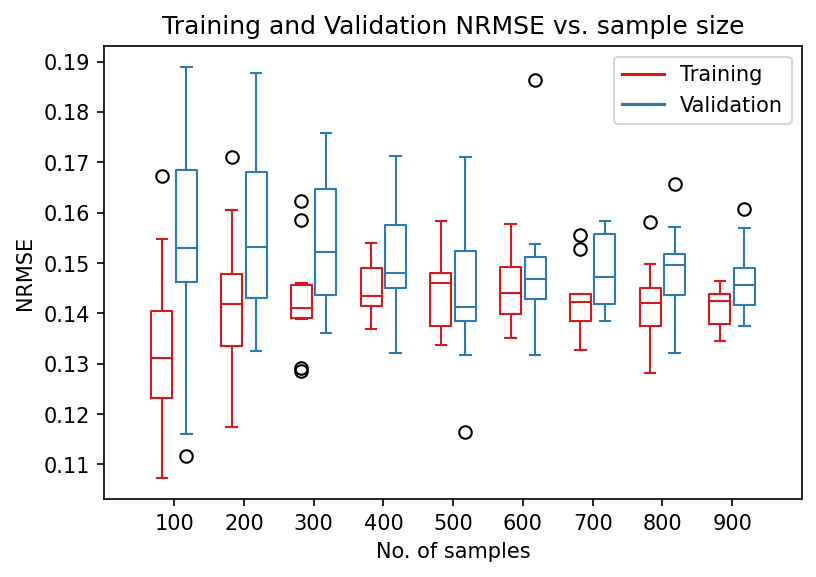

In [16]:
#Plotting the results

plt.figure(dpi=150)

ticks = np.arange(100,1000,100) #ticks for number of samples on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('No. of samples')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. sample size')

plt.show()

### Observed trends:

The spread/variance of the NRMSE with different random seeds decreases with increasing samples. The NRMSE's of the training and validation data sets get closer together as the number of samples increase. Possible reason for this is that increasing the number of samples and target data brings us closer to the actual model and reduces dependence on random seed. More points available for fitting will always give a better picture of the overall function (of course upto a certain point). From a more mathematical point of view, the variance between the training and validation sets goes as 1/N which implies it goes down as N increases

### (b)- Training and validation NRMSE vs. number of variables
- We will see the trends in NRMSE of the training and validation data sets obtained using the pseudo inverse method as number of variables is varied from 5 to 20 in steps of 1.

- The following will be held constant across different dimensions:
    - Number of samples
    - The weight vector used to generate the target data
    - The noise variance used to generate the target data
    - The L2 regularization weight lambda_2 used to obtain optimal weights using pseudo inverse
- The data matrix generated for each sample size and random seed will be split into 7:3 ratio for training and validation respectively.
- For each dimension, random seed will be varied from 11-20 to obtain a corresponding NRMSE
- The mean and variance of NRMSE for training and validation for each sample size will be plotted using box plots


In [17]:
#Training and validation NRMSE obtained using pseudo inverse with number of variables/dimensions

#we will fix the number of samples to 600
samples=600

#set a noise variance for creating the target data 't'
noise=0.5

#set a weight for L2 regularization
lambda_2=0.5

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

for dim in range(5,20):
    #loop over the number of dimensions
    
    #we will generate a weight vector for creating the target data 't' and keep this fixed for same dimension
    np.random.seed(51)
    weights= np.random.randn(dim+1) #including bias
    
    #initialize empty lists for storing data for each random seed for a given dimension
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, y_train, mse_train = optimal_weight(X_train,t_train,lambda_2) 

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)

        #normalize the MSE to get NRMSE
        temp_train.append(np.sqrt(mse_train)/np.std(t_train))
        temp_validate.append(np.sqrt(mse_validate)/np.std(t_validate))
        
    #append the list of NRMSE for different random seeds to a list of lists containing data for different dimensions
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)


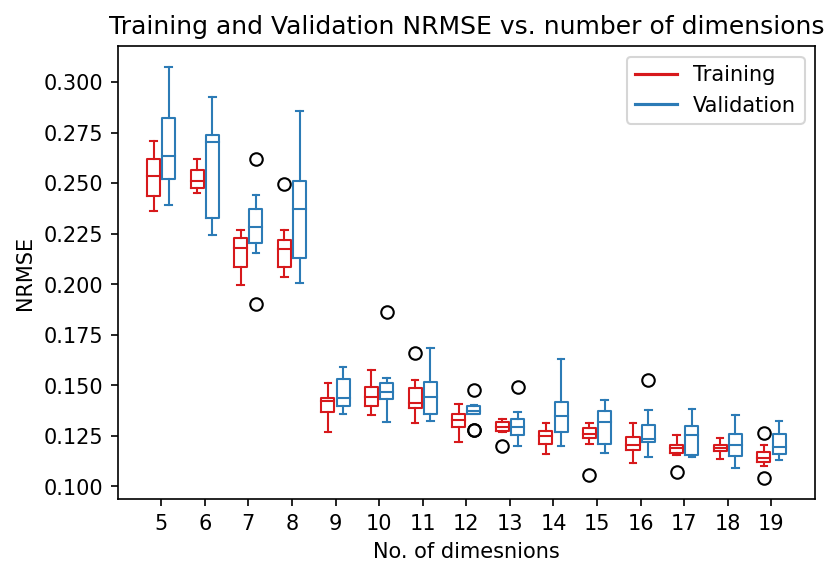

In [18]:
#Plotting the results

plt.figure(dpi=150)

ticks = np.arange(5,20,1) #ticks for number of variables on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('No. of dimesnions')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. number of dimensions')

plt.show()

## Observations:
- Training and validation NRMSE decreases with increasing number of dimensions
- Spead in the NRMSE of both also decrease with increasing number of dimensions

### (c)- Training and validation NRMSE vs. noise variance
- We will see the trends in NRMSE of the training and validation data sets obtained using the pseudo inverse method as noise variance used to generate target vector 't' is varied from 0.1 to 1.9 in steps of 0.2.

- The following will be held constant across different dimensions:
    - Number of samples
    - Number of dimensions
    - The weight vector used to generate the target data
    - The L2 regularization weight lambda_2 used to obtain optimal weights using pseudo inverse
- The data matrix generated for each sample size and random seed will be split into 7:3 ratio for training and validation respectively.
- For each dimension, random seed will be varied from 11-20 to obtain a corresponding NRMSE
- The mean and variance of NRMSE for training and validation for each sample size will be plotted using box plots



In [19]:
#Training and validation NRMSE obtained using pseudo inverse with noise variance

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=10

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a weight for L2 regularization
lambda_2=0.5

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#noise values to loop over
noise_set= np.arange(0.1,2.1,0.2)

for noise in noise_set:
    #loop over the noise variance in steps of 0.2
    
    noise=round(noise,1) #round upto first decimal place. For some weird reason python adds a small offset
    
    #initialize empty lists for storing data for each random seed for a given noise variance
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, y_train, mse_train = optimal_weight(X_train,t_train,lambda_2) 

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)

        #normalize the MSE to get NRMSE
        temp_train.append(np.sqrt(mse_train)/np.std(t_train))
        temp_validate.append(np.sqrt(mse_validate)/np.std(t_validate))
        
    #append the list of NRMSE for different random seeds to a list of lists containing data for different noise values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)


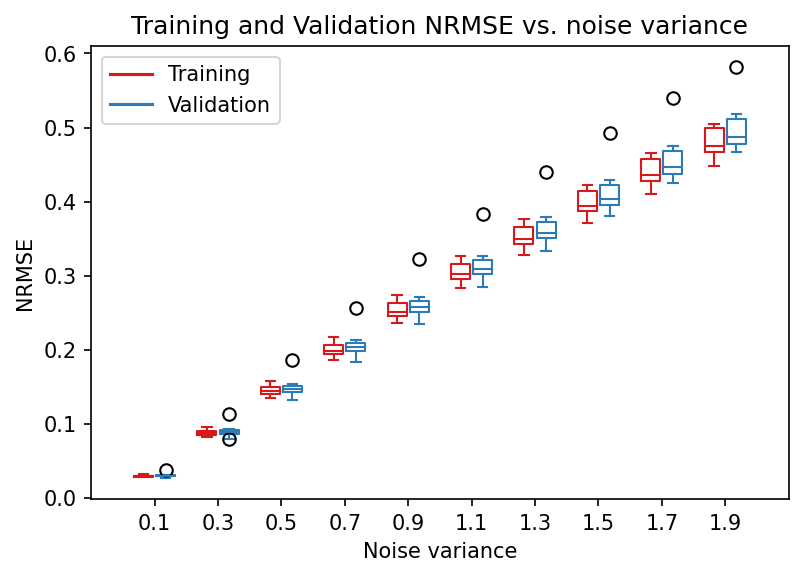

In [20]:
#Plotting the results

plt.figure(dpi=150)

ticks=np.round(noise_set,1) #ticks for noise variance values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('Noise variance')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. noise variance')

plt.show()

## Observations:
- Training and validation NRMSE increase with increasing the noise in the target data as expected as the former is a measure of the latter once an ideal weight has been found.
- The variance in NRMSE for a given noise variance value also increases with noise

### (d)- Training and validation NRMSE vs. bias
- We will see the trends in NRMSE of the training and validation data sets obtained using the pseudo inverse method as bias is varied from 0 to 1000 in powers of 10.

- The following will be held constant across different dimensions:
    - Number of samples
    - Number of dimensions
    - The weight vector used to generate the target data (except bias)
    - The noise variance used to generate the target vector t
    - The L2 regularization weight lambda_2 used to obtain optimal weights using pseudo inverse
- The data matrix generated for each sample size and random seed will be split into 7:3 ratio for training and validation respectively.
- For each dimension, random seed will be varied from 11-20 to obtain a corresponding NRMSE
- The mean and variance of NRMSE for training and validation for each sample size will be plotted using box plots




In [21]:
#Training and validation NRMSE obtained using pseudo inverse with w0 (bias)

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=10

#we will generate a weight vector (excluding the bias) for creating the target data 't' and keep this fixed
np.random.seed(51)
w= np.random.randn(dim) #excluding bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a weight for L2 regularization
lambda_2=0.5

#bias values to loop over: 0 to 1 in steps of 0.05
bias_set= 10.0**(np.arange(-2,4,1))

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

for w0 in bias_set:
    #loop over the bias values
    
    w0=round(w0,1) #round upto first decimal place. For some weird reason python adds a small offset
    
    #initialize empty lists for storing data for each random seed for a given bias
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, w, w0, noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, y_train, mse_train = optimal_weight(X_train,t_train,lambda_2) 

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)

        #normalize the MSE to get NRMSE
        temp_train.append(np.sqrt(mse_train)/np.std(t_train))
        temp_validate.append(np.sqrt(mse_validate)/np.std(t_validate))
        
    #append the list of NRMSE for different random seeds to a list of lists containing data for different number of samples
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)


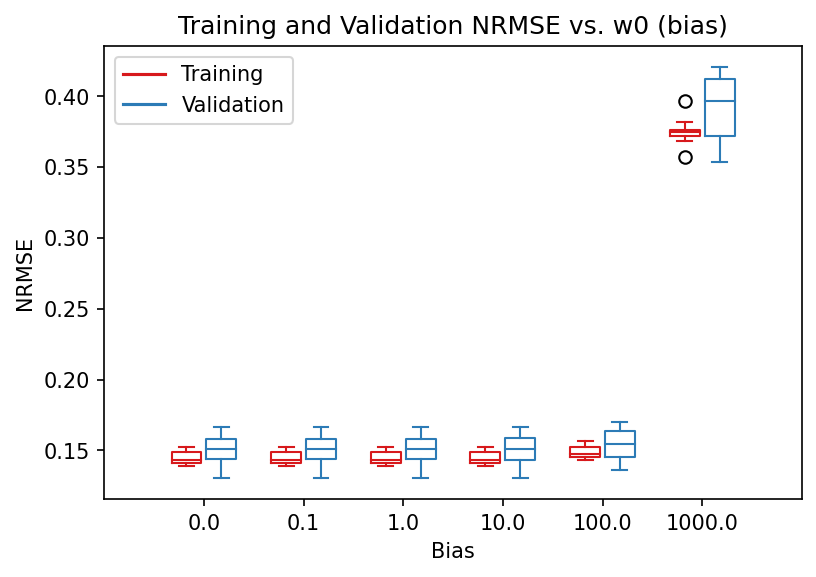

In [22]:
#Plotting the results

plt.figure(dpi=150)

ticks = np.round(bias_set,1) #ticks for bias values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('Bias')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. w0 (bias)')

plt.show()

## Observations
- NRMSE for both training and validation sets remains roughly constant for different bias values until 1000.
- After this point, NRMSE shoots up as the bias term dominates the loss function and coming close to the value of the bias term does not imply coming close to the actual weights of the model

### (e)- Training and validation NRMSE vs. lambda_2
- We will see the trends in NRMSE of the training and validation data sets obtained using the pseudo inverse method as lambda_2 is varied from 0.01 to 100 in powers of 10.

- The following will be held constant across different dimensions:
    - Number of samples
    - Number of dimensions
    - The weight vector used to generate the target data
    - The noise variance used to generate the target vector t
- The data matrix generated for each sample size and random seed will be split into 7:3 ratio for training and validation respectively.
- For each dimension, random seed will be varied from 11-20 to obtain a corresponding NRMSE
- The mean and variance of NRMSE for training and validation for each sample size will be plotted using box plots


In [23]:
#Training and validation NRMSE obtained using pseudo inverse with lambda_2

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=10

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#lambda_2 values to loop over
lambda2_set= 10.0**(np.arange(-2,3,1))

for lambda_2 in lambda2_set:
    #loop over lambda_2 values
    
    #initialize empty lists for storing data for each random seed for a given lambda_2 value
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, y_train, mse_train = optimal_weight(X_train,t_train,lambda_2) 

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)

        #normalize the MSE to get NRMSE
        temp_train.append(np.sqrt(mse_train)/np.std(t_train))
        temp_validate.append(np.sqrt(mse_validate)/np.std(t_validate))
        
    #append the list of NRMSE for different random seeds to a list of lists containing data for different lambda_2 values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)



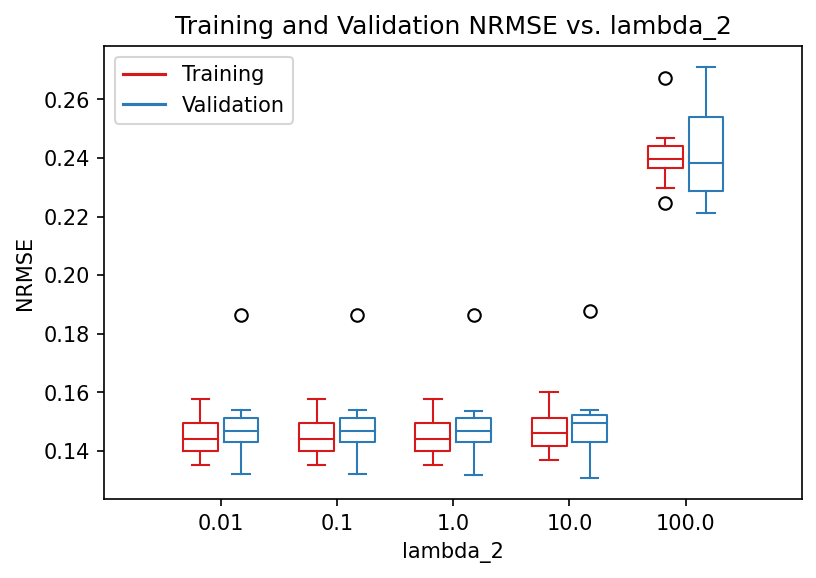

In [24]:
#Plotting the results

plt.figure(dpi=150)

ticks = lambda2_set #ticks for lambda_2 values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('lambda_2')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. lambda_2')

plt.show()

## Observations: 
- NRMSE for both training and validation sets remains roughly constant for different lambda_2 values.
- It increases sharply at lambda_2=100 as the L2 regularization term dominates the loss function, driving the weights towards zero and moving away from the optimal lambda_2 that minimizes NRMSE.
- Although it is expected that difference in NRMSE of training and validation data come closer together with increasing lambda_2 values, no such trend is observable for this given data set.

## 13 (f): 

### Time taken to solve pseudo inverse with number of samples and its breaking points

- We will probe sample sizes from 10, incrementing in powers of 10 until a breaking point is found
- We will keep dimension, weights, noise, and lambda_2 constant

In [25]:
#Time taken to solve pseudo inverse with number of samples and its breaking points
import time

#we will fix the number of dimensions
dim=10

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a weight for L2 regularization
lambda_2=0.5

#sample sizes to loop over
sample_set= 10**(np.arange(1,8))

#initialize empty lists to store the results
sample_size_list=[]
perf_time_list=[]

for samples in sample_set:
    #loop over the sample size

    #generate a data matrix using the previously made function

    X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

    #generate target data
    t= target_data(X, weights[1:], weights[0], noise)
    
    tic = time.perf_counter() #start the timer

    #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE using pseudo inverse
    w_ml, y_ml, mse_ml = optimal_weight(X, t, lambda_2) 
    
    toc= time.perf_counter() #stop the timer
    
    #append sample size and performance time to lists
    sample_size_list.append(samples)
    perf_time_list.append(toc-tic)
        

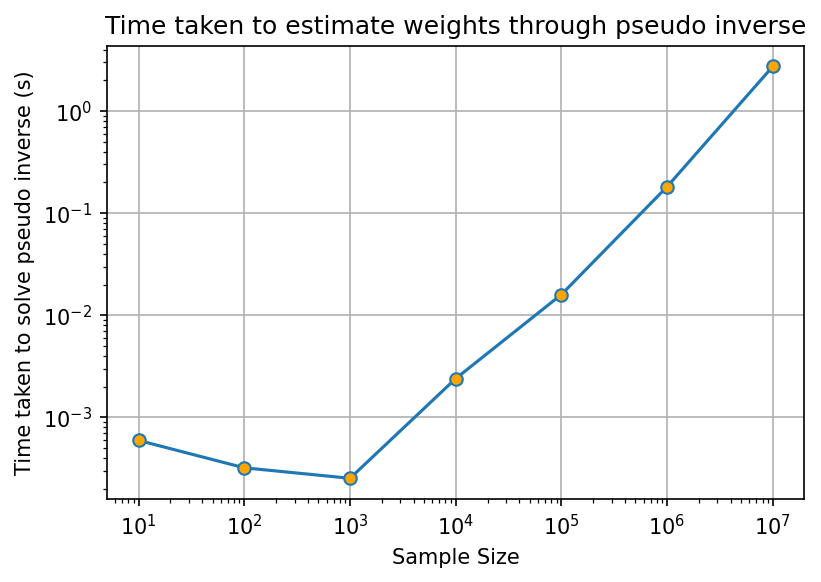

In [26]:
#Plotting the results

plt.figure(dpi=150)
plt.plot(sample_size_list, perf_time_list, marker='o', markerfacecolor='orange') #plot

#plot both the time and sample size axis on a log scale
plt.xscale("log")
plt.yscale("log")

#Labelling and garnishing
plt.xlabel('Sample Size')
plt.ylabel('Time taken to solve pseudo inverse (s)')
plt.minorticks_on()
plt.grid()

plt.title('Time taken to estimate weights through pseudo inverse')

plt.show()

## Observations:

- Breaking point for number of samples: $10^8$ samples
- The time taken to compute maximum likelihood weights through pseudo inverse remains roughly constant for sample sizes 10-1000 and then increases linearly on a **log** scale upto a sample size of $10^7$ after which the kernel breaks.
- It is linear on the log scale because the order of complexity of the matrix operations in calculating pseudo inverse, scales as powers of the dimension of the data matrix. 
- Breaking point is reached because at a sample size of $10^8$ the RAM gets completely filled with temporary variables of intermediate steps required to execute the operation. This causes the kernel to crash

## 13 (f): 

### Time taken to solve pseudo inverse with number of variables and its breaking points
- We will probe number of variables (dimension) from 1, incrementing in powers of 10 until a breaking point is found
- We will keep number of samples, weights, noise, and lambda_2 constant.
- Keeping number of samples fixed at 100, we will probe number of dimensions> 100 to test the breaking point. Note that, when this occurs, the solution to the wights obtained will not be unique as no. of columns> no. of rows of data matrix. However, since we are not testing accuracy of models and only probing how long it takes to perform the optimal weights computation as a function of dimension, this is not an issue.

In [27]:
#Time taken to solve pseudo inverse with number of variables and its breaking points
import time

#we will fix the number of samples
samples=100

#set a noise variance for creating the target data 't'
noise=0.5

#set a weight for L2 regularization
lambda_2=0.5

#sample sizes to loop over
dim_set= 10**(np.arange(0,5))

#initialize empty lists to store the results
dim_list=[]
perf_time_list=[]

for dim in dim_set:
    #loop over the different dimension values
    
    #we will generate a weight vector for creating the target data 't'        
    np.random.seed(51)
    weights= np.random.randn(dim+1) #including bias

    #generate a data matrix using the previously made function

    X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

    #generate target data
    t= target_data(X, weights[1:], weights[0], noise)
    
    tic = time.perf_counter() #start the timer

    #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE using pseudo inverse
    w_ml, y_ml, mse_ml = optimal_weight(X, t, lambda_2) 
    
    toc= time.perf_counter() #stop the timer
    
    #append sample size and performance time to lists
    dim_list.append(dim)
    perf_time_list.append(toc-tic)
        

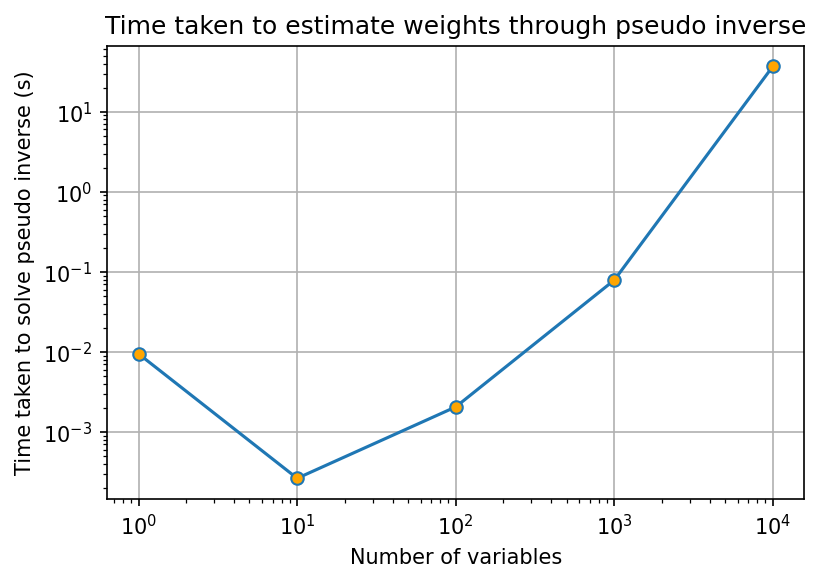

In [28]:
#Plotting the results

plt.figure(dpi=150)
plt.plot(dim_list, perf_time_list, marker='o', markerfacecolor='orange') #plot

#plot both the time and sample size axis on a log scale
plt.xscale("log")
plt.yscale("log")

#Labelling and garnishing
plt.xlabel('Number of variables')
plt.ylabel('Time taken to solve pseudo inverse (s)')
plt.minorticks_on()
plt.grid()

plt.title('Time taken to estimate weights through pseudo inverse')

plt.show()

## Observations:

- Breaking point for number of variables: $10^5$ variables
- The time taken to compute maximum likelihood weights through pseudo inverse remains linear on a **log** scale for dimensions 1-100 and then increases sharply upto a dimension of $10^4$ after which the kernel breaks.
- It is linear on the log scale because the order of complexity of the matrix operations in calculating pseudo inverse, scales as powers of the dimensions of the data matrix.
- The computation time increase is more pronounced for increasing number of variables compared to increasing sample size.
- This is expected because the complexity of pseudo inverse operation goes as $O(M^3 + MN)$ where $M$ is the number of variables and $N$ is the number of samples. Clearly complexity increases more rapidly with $M$ compared to $N$.
- Breaking point is reached because at a dimension of $10^4$ the RAM gets completely filled with temporary variables of intermediate steps required to execute the operation. This causes the kernel to crash

## 13 (g)- Training and validation NRMSE using gradient descent vs. max_iter
- We will see the trends in NRMSE of the training and validation data sets obtained using the gradient descent method as maximum iterations for gradient descent loop is varied from 10 to 10^5 in powers of 10.

- The following will be held constant across different dimensions:
    - Number of samples
    - Number of dimensions
    - The weight vector used to generate the target data
    - The noise variance used to generate the target vector t
    - The step size (eta)
    - The threshold for minimum change of NRMSE in the gradient descent function (set to a low value to test the effect of increasing number of iterations).
- The data matrix generated for each sample size and random seed will be split into 7:3 ratio for training and validation respectively.
- For each dimension, random seed will be varied from 11-20 to obtain a corresponding NRMSE
- The mean and variance of NRMSE for training and validation for each sample size will be plotted using box plots



In [29]:
#Training and validation NRMSE obtained using gradient descent with max_iter 

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=10

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a step size for the gradient descent function
eta=0.001

#set a minimum bound for change of NRMSE (set a very low value to test the effect of varying number of iterations)
min_change_NRMSE= 1e-8

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#max number of iteration values to loop over
max_iter_set= 10.0**(np.arange(1,6,1))

for max_iter in max_iter_set:
    #loop over max_iter values
    
    #initialize empty lists for storing data for each random seed for a given max_iter value
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, train_NRMSE = gradient_descent(X_train, t_train, eta, max_iter, min_change_NRMSE) #lambda_2, lambda_1 =0 by default

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)
        validate_NRMSE= np.sqrt(mse_validate)/np.std(t_validate) #normalize MSE

        #append the NRMSE to temporary lists corresponding to each max_iter value
        temp_train.append(train_NRMSE)
        temp_validate.append(validate_NRMSE)
        
    #append the list of NRMSE for different random seeds to a list of lists containing data for different max_iter values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)


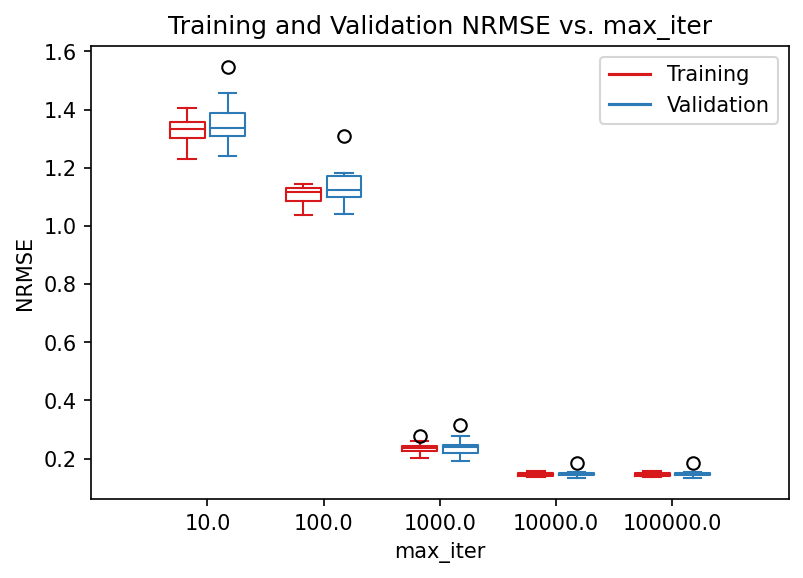

In [30]:
#Plotting the results

plt.figure(dpi=150)

ticks = max_iter_set #ticks for max_iter values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('max_iter')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. max_iter')

plt.show()

## Observations:
- The NRMSE of training and validation sets both decrease with increasing number of iterations as expected. This is because at low number of iterations, there are not enough steps for the function given the eta value to reach the optimal weight. 
- The individual variance of the NRMSE for both sets across different iterations also decrease.
- Training and validation NRMSE also get closer together as number of iterations increase.
- Saturation is reached at around 10000 iterations implying the gradient descent function has approached near to the optimal weight and successive iterations keep the loop close to optimum.

## 13 (h)- Training and validation NRMSE obtained using gradient descent vs. eta
- We will see the trends in NRMSE of the training and validation data sets obtained using the gradient descent method as eta is varied from $10^{-5}$ to 0.1 in powers of 10.

- The following will be held constant across different dimensions:
    - Number of samples
    - Number of dimensions
    - The weight vector used to generate the target data
    - The noise variance used to generate the target vector t
    - Maximum number of iterations for the gradient descent function
    - The threshold for minimum change of NRMSE in the gradient descent function (set to a low value to test the effect of increasing number of iterations).
- The data matrix generated for each sample size and random seed will be split into 7:3 ratio for training and validation respectively.
- For each dimension, random seed will be varied from 11-20 to obtain a corresponding NRMSE
- The mean and variance of NRMSE for training and validation for each sample size will be plotted using box plots



In [31]:
#Training and validation NRMSE obtained using gradient descent with eta 

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=10

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a maximum iteration limit for the gradient descent function
max_iter=1000

#set a minimum bound for change of NRMSE (set a very low value to test the effect of varying step size)
min_change_NRMSE= 1e-8

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#eta- step size values to loop over
eta_set= 10.0**(np.arange(-5,0,1))

for eta in eta_set:
    #loop over eta values
    
    #initialize empty lists for storing data for each random seed for a given eta value
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, train_NRMSE = gradient_descent(X_train, t_train, eta, max_iter, min_change_NRMSE) #lambda_2, lambda_1 =0 by default

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)
        validate_NRMSE= np.sqrt(mse_validate)/np.std(t_validate) #normalize MSE

        #append the NRMSE to temporary lists corresponding to each eta value
        temp_train.append(train_NRMSE)
        temp_validate.append(validate_NRMSE)
        
    #append the list of NRMSE for different random seeds to a list of lists containing data for different eta values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)



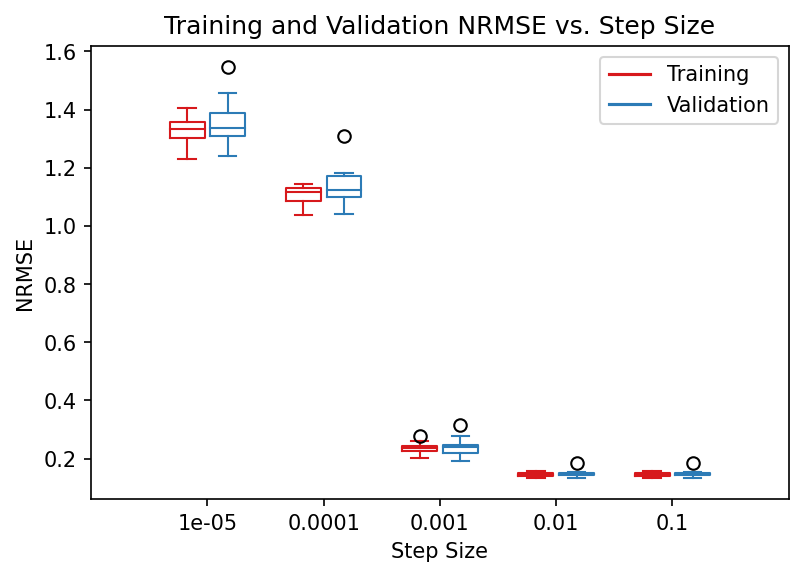

In [32]:
#Plotting the results

plt.figure(dpi=150)

ticks = eta_set #ticks for eta values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('Step Size')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. Step Size')

plt.show()

## Observations:
- - The NRMSE of training and validation sets both decrease with increasing step size as expected. This is because at low step size, the steps are not large enough for the given maximum iterations for the function to reach optimal weights. 
- The individual variance of the NRMSE for both sets across different eta values also decrease.
- Training and validation NRMSE also get closer together as step size increases.
- Saturation is reached at a step size of 0.01 implying the gradient descent function has approached near to the optimal weight and successive iterations keep the loop close to optimum.
- For higher step sizes/eta values, the weights diverge rapidly from the optimum resulting in extremely high NRMSEs, which is expected

## 13 (i): 

### Time taken to solve gradient descent with number of samples and its breaking point
- We will probe number of samples from 10, incrementing in powers of 10 until a breaking point is found
- We will keep number of variables (dimension), weights, noise, max_iter, min_change_NRMSE, and eta fixed. 
- We will fix eta to a small value so that gradient descent function hits the maximum number of fixed iterations every time

In [33]:
#Time taken to solve gradient descent with number of samples and its breaking points
import time

#we will fix the number of dimensions
dim=10

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a maximum iteration limit for the gradient descent function
max_iter=100

#set a small step size for the gradient descent function
eta=1e-5

#set a minimum bound for change of NRMSE (set a very low value to test the effect of varying the other parameters)
min_change_NRMSE= 1e-8

#sample sizes to loop over
sample_set= 10**(np.arange(1,8))

#initialize empty lists to store the results
sample_size_list=[]
perf_time_list=[]

for samples in sample_set:
    #loop over the sample size

    #generate a data matrix using the previously made function

    X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

    #generate target data
    t= target_data(X, weights[1:], weights[0], noise)
    
    tic = time.perf_counter() #start the timer

    #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
    w_gd, NRMSE_gd = gradient_descent(X, t, eta, max_iter, min_change_NRMSE) #lambda_2, lambda_1 =0 by default
    
    toc= time.perf_counter() #stop the timer
    
    #append sample size and performance time to lists
    sample_size_list.append(samples)
    perf_time_list.append(toc-tic)
        

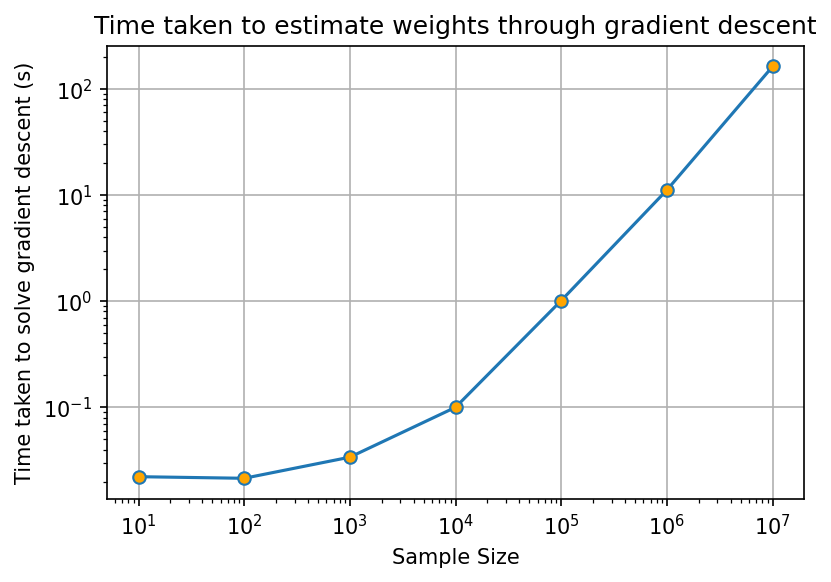

In [34]:
#Plotting the results

plt.figure(dpi=150)
plt.plot(sample_size_list, perf_time_list, marker='o', markerfacecolor='orange') #plot

#plot both the time and sample size axis on a log scale
plt.xscale("log")
plt.yscale("log")

#Labelling and garnishing
plt.xlabel('Sample Size')
plt.ylabel('Time taken to solve gradient descent (s)')
plt.minorticks_on()
plt.grid()

plt.title('Time taken to estimate weights through gradient descent')

plt.show()

## Observations:

- Breaking point for number of samples: $10^8$ samples
- The time taken to compute maximum likelihood weights through gradient increases linearly on a **log** scale after $10^4$ samples until $10^7$ samples after which the kernel breaks.
- The computation time increase is more pronounced for gradient descent compared to pseudo inverse due to the occurence of many loops unlike in pseudo inverse where the operations are vectorized.
- There is an overall increase in computation time per sample size for the gradient descent method due to this, but the breaking point for number of samples for both methods is **same**.
- Breaking point is reached because at a sample size of $10^8$ the RAM gets completely filled with temporary variables of intermediate steps required to execute the operation. This causes the kernel to crash

## 13 (i): 

### Time taken to solve gradient descent with number of variables and its breaking points
- We will probe number of variables (dimension) from 1, incrementing in powers of 10 until a breaking point is found
- We will keep number of samples, weights, noise, max_iter, min_change_NRMSE, and eta fixed. 
- We will fix eta to a small value so that gradient descent function hits the maximum number of fixed iterations every time.
- Keeping number of samples fixed at 100, we will probe number of dimensions> 100 to test the breaking point. Note that, when this occurs, the solution to the wights obtained will not be unique as no. of columns> no. of rows of data matrix. However, since we are not testing accuracy of models and only probing how long it takes to perform the optimal weights computation as a function of dimension, this is not an issue.

In [35]:
#Time taken to solve gradient descent with number of variables and its breaking points
import time

#we will fix the number of samples
samples=100

#set a noise variance for creating the target data 't'
noise=0.5

#set a maximum iteration limit for the gradient descent function
max_iter=100

#set a small step size for the gradient descent function
eta=1e-5

#set a minimum bound for change of NRMSE (set a very low value to test the effect of varying the other parameters)
min_change_NRMSE= 1e-8

#number of variables/dimensions to loop over
dim_set= 10**(np.arange(0,7))

#initialize empty lists to store the results
dim_list=[]
perf_time_list=[]

for dim in dim_set:
    #loop over the dimensions
    
    #we will generate a weight vector for creating the target data 't' 
    np.random.seed(51)
    weights= np.random.randn(dim+1) #including bias

    #generate a data matrix using the previously made function

    X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

    #generate target data
    t= target_data(X, weights[1:], weights[0], noise)
    
    tic = time.perf_counter() #start the timer

    #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
    w_gd, NRMSE_gd = gradient_descent(X, t, eta, max_iter, min_change_NRMSE) #lambda_2, lambda_1 =0 by default
    
    toc= time.perf_counter() #stop the timer
    
    #append dimensions and performance time to lists
    dim_list.append(dim)
    perf_time_list.append(toc-tic)
        

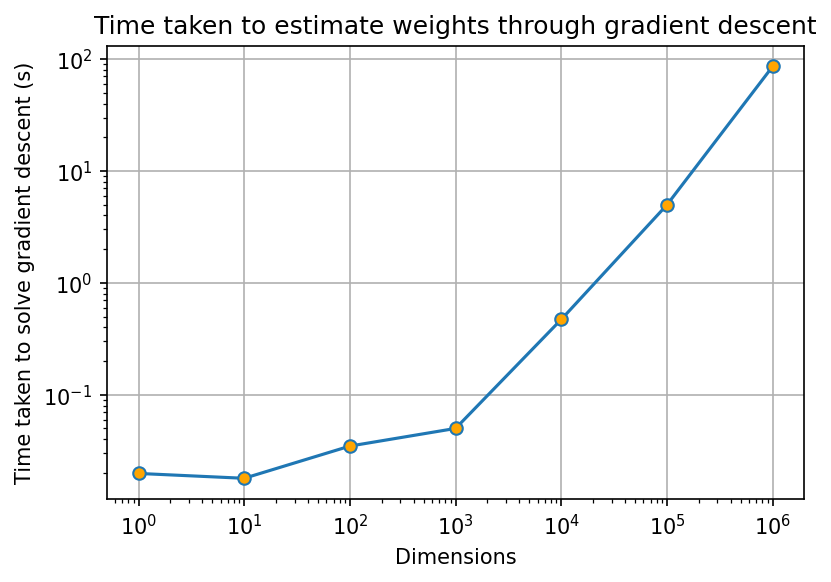

In [36]:
#Plotting the results

plt.figure(dpi=150)
plt.plot(dim_list, perf_time_list, marker='o', markerfacecolor='orange') #plot

#plot both the time and sample size axis on a log scale
plt.xscale("log")
plt.yscale("log")

#Labelling and garnishing
plt.xlabel('Dimensions')
plt.ylabel('Time taken to solve gradient descent (s)')
plt.minorticks_on()
plt.grid()

plt.title('Time taken to estimate weights through gradient descent')

plt.show()

## Observations:

- Breaking point for number of variables: $10^7$ variables
- The time taken to compute maximum likelihood weights through pseudo gradient descent increases linearly on a **log** scale after $10^3$ dimensions upto $10^6$ dimensions after which the kernel breaks.
- The computation time increase is more pronounced for increasing number of variables compared to increasing sample size.
- Breaking point for gradient descent for number of dimensions accessible is **far higher** compared to the breaking point of $10^4$ dimensions through pseudo inverse, though the computation time for a given sample size is also higher compared to pseudo inverse.
- It is most likely due to the fact that **complexity of operations is traded for more loops in the gradient descent method** decreasing the RAM memory but increasing the computation time, allowing far higher number of dimensions to be accessible before crashing.
- Breaking point is reached because at a dimension of $10^7$ the RAM gets completely filled with temporary variables of intermediate steps required to execute the operation. This causes the kernel to crash

## 13 (k):

### Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda_2

In [37]:
#Training and validation NRMSE obtained using gradient descent with lambda_2 

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=100

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a maximum iteration limit for the gradient descent function
max_iter=10000

#set a step size for gradient descent
eta=0.001

#set a minimum bound for change of NRMSE
min_change_NRMSE= 1e-6

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#initialize an empty list to store number of nearly zero weights
zero_weights= []

#lambda_2- L2 regularization weight values to loop over
lambda2_set= 10.0**(np.arange(-3,3,1))

#set a threshold value to judge whether the weight is nearly zero
zero_threshold= 0.01

for lambda_2 in lambda2_set:
    #loop over lambda_2 values
    
    #initialize empty lists for storing data for each random seed for a lambda_2 value
    temp_train=[]
    temp_validate=[]
    temp_zero_weights=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, train_NRMSE = gradient_descent(X_train, t_train, eta, max_iter, min_change_NRMSE, lambda_2) #lambda_1 =0 by default

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)
        validate_NRMSE= np.sqrt(mse_validate)/np.std(t_validate) #normalize MSE

        #append the NRMSE to temporary lists corresponding to each lambda_2 value
        temp_train.append(train_NRMSE)
        temp_validate.append(validate_NRMSE)
        
        #check the number of nearly zero weights
        number_zero_weights= len(w_train[np.where(abs(w_train)<zero_threshold)])
        
        #append the number of nearly zero weights to a temporary list
        temp_zero_weights.append(number_zero_weights)
        
    #append the list of NRMSE and nearly zero weights for different random seeds to a list of lists containing data for different lambda_2 values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)
    zero_weights.append(temp_zero_weights)


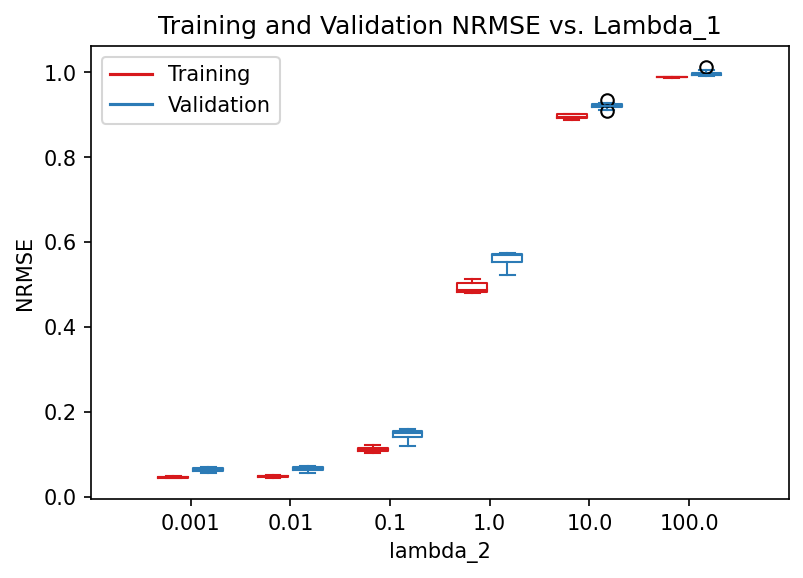

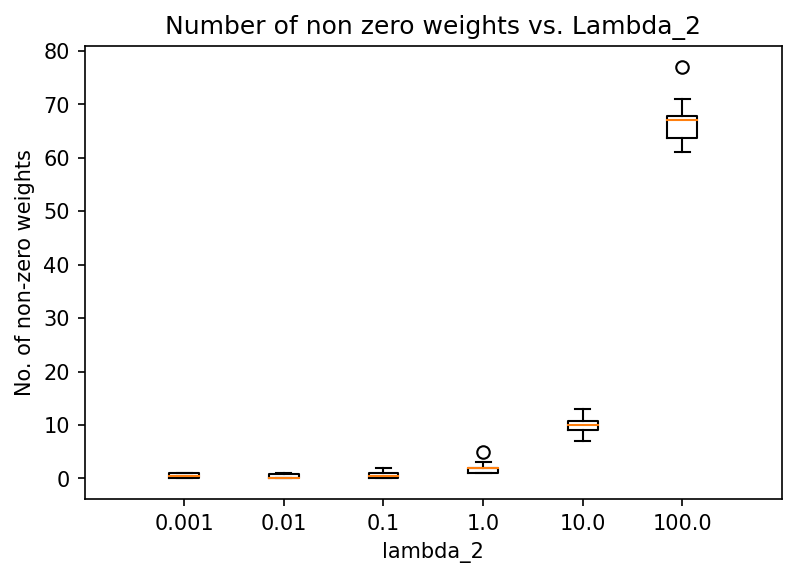

In [38]:
#Plotting the results of NRMSE vs. lambda_2

plt.figure(dpi=150)

ticks = lambda2_set #ticks for lambda_2 values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('lambda_2')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. Lambda_1')

plt.show()

#plot the number of non zero weights vs. lambda_2
plt.figure(dpi=150)

non_zero_wights_plot= plt.boxplot(zero_weights, positions=np.array(np.arange(len(NRMSE_train)))*2.0,
                               widths=0.6)

plt.xlabel('lambda_2')
plt.ylabel('No. of non-zero weights')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks)*2 , 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Number of non zero weights vs. Lambda_2')

plt.show()

## Observations

- The NRMSE of both training and validation sets increase with increasing lambda_2 values. This is expected because when the weight of the regularization increases, the solution obtained through gradient descent will lie further and further away from the optimal weight value which minimizes NRMSE for the training set. 
- The difference in NRMSE between training and validation also gets closer together as lambda_2 increases as expected.
- The number of nearly zero weights also increases with increasing lambda_2. This is because the weights which optimize the L2 norm is the zero weight vector. Thus, their contribution to the otpimal solution increases with increasing lambda_2 (weight of L2 regularization).
- **Optimum lambda_2= 0.01** when NRMSE of validation set is least

## 13 (l):

### Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

In [39]:
#Training and validation NRMSE obtained using gradient descent with lambda_1 

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=100

#we will generate a weight vector for creating the target data 't' and keep this fixed
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a noise variance for creating the target data 't'
noise=0.5

#set a maximum iteration limit for the gradient descent function
max_iter=10000

#set a step size for gradient descent
eta=0.001

#set a minimum bound for change of NRMSE
min_change_NRMSE= 1e-6

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#initialize an empty list to store number of nearly zero weights
zero_weights= []

#lambda_1- L1 regularization weight values to loop over
lambda1_set= 10.0**(np.arange(-3,2,1))

#set a threshold value to judge whether the weight is nearly zero
zero_threshold= 0.01

for lambda1 in lambda1_set:
    #loop over lambda_1 values
    
    #initialize empty lists for storing data for each random seed for a lambda_1 value
    temp_train=[]
    temp_validate=[]
    temp_zero_weights=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, train_NRMSE = gradient_descent(X_train, t_train, eta, max_iter, min_change_NRMSE, lambda_1=lambda1) #lambda_2 =0 by default

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)
        validate_NRMSE= np.sqrt(mse_validate)/np.std(t_validate) #normalize MSE

        #append the NRMSE to temporary lists corresponding to each lambda_1 value
        temp_train.append(train_NRMSE)
        temp_validate.append(validate_NRMSE)
        
        #check the number of nearly zero weights
        number_zero_weights= len(w_train[np.where(abs(w_train)<zero_threshold)])
        
        #append the number of nearly zero weights to a temporary list
        temp_zero_weights.append(number_zero_weights)
        
    #append the list of NRMSE and nearly zero weights for different random seeds to a list of lists containing data for different lambda_1 values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)
    zero_weights.append(temp_zero_weights)



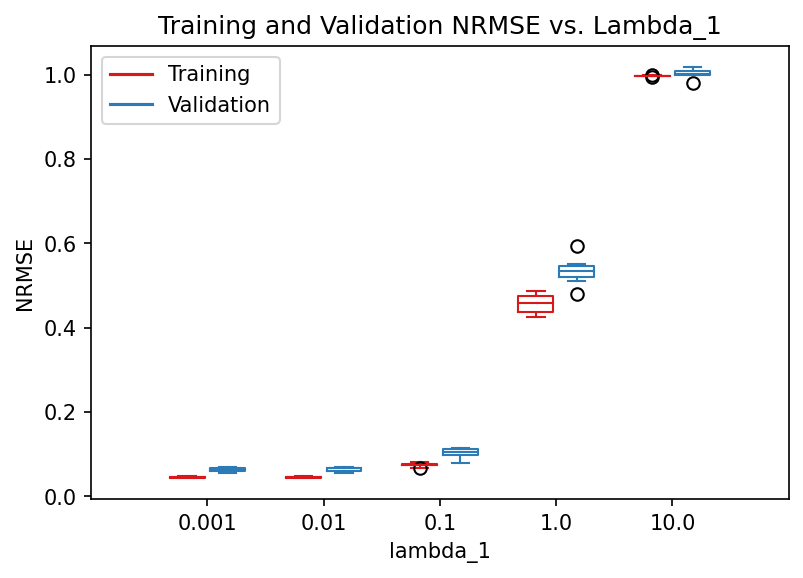

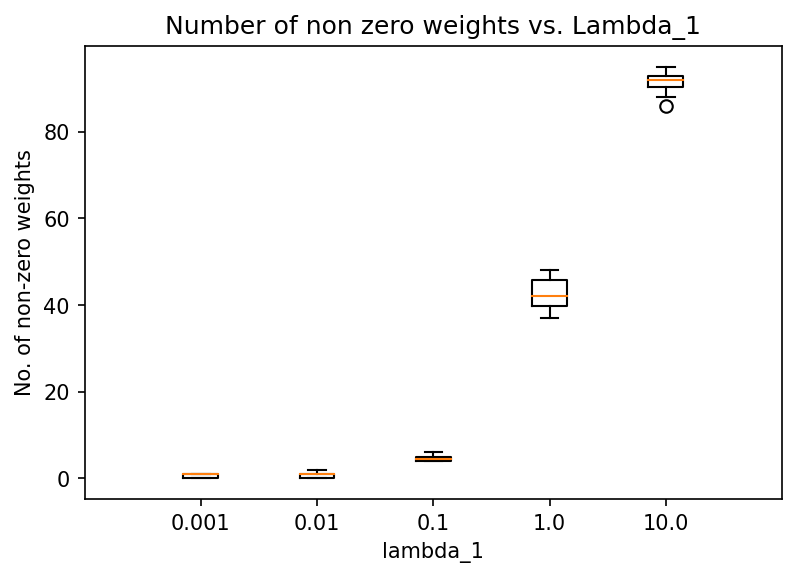

In [40]:
#Plotting the results of NRMSE vs. lambda_1

plt.figure(dpi=150)

ticks = lambda1_set #ticks for lambda_1 values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('lambda_1')
plt.ylabel('NRMSE')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. Lambda_1')

plt.show()

#plot the number of non zero weights vs. lambda_1
plt.figure(dpi=150)

non_zero_wights_plot= plt.boxplot(zero_weights, positions=np.array(np.arange(len(NRMSE_train)))*2.0,
                               widths=0.6)

plt.xlabel('lambda_1')
plt.ylabel('No. of non-zero weights')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks)*2 , 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Number of non zero weights vs. Lambda_1')

plt.show()

## Observations

- The NRMSE of both training and validation sets increase with increasing lambda_1 values. This is expected because when the weight of the regularization increases, the solution obtained through gradient descent will lie further and further away from the optimal weight value which minimizes NRMSE for the training set. 
- The difference in NRMSE between training and validation also gets closer together as lambda_1 increases as expected.
- The number of nearly zero weights also increases with increasing lambda_1. This is because the weights which optimize the L1 norm is the zero weight vector. Thus, their contribution to the optimal solution increases with increasing lambda_1 (weight of L1 regularization).
- Most importantly, the number of non zero weights obtained from gradient descent for a lambda_1 value is far higher than the same lambda_2 value. **This implies that L1 regularization is far more effective in driving the weights towards zero compared to L2 regularization**.
- **Optimum lambda_1=0.01** when NRMSE of validation set is least

## 13 (m): 

### Training and validation NRMSE for optimal lambda2 with noise variance

In [41]:
#Training and validation NRMSE obtained using gradient descent with noise variance for optimal lambda_2

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=100

#we will generate a weight vector for creating the target data 't' 
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a maximum iteration limit for the gradient descent function
max_iter=5000

#set a step size for gradient descent
eta=0.01

#set a minimum bound for change of NRMSE
min_change_NRMSE= 1e-6

#set the L2 regularization value to the optimal value
lambda2= 0.01

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#noise values to loop over
noise_set= np.arange(0.1,2.1,0.2)


for noise in noise_set:
    #loop over noise values in steps of 2
    
    #initialize empty lists for storing data for each random seed for a given noise value
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, train_NRMSE = gradient_descent(X_train, t_train, eta, max_iter, min_change_NRMSE, lambda_2=lambda2) #lambda_1 =0 by default

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)
        validate_NRMSE= np.sqrt(mse_validate)/np.std(t_validate) #normalize MSE

        #append the NRMSE to temporary lists corresponding to each noise value
        temp_train.append(train_NRMSE)
        temp_validate.append(validate_NRMSE)
        
        
    #append the list of NRMSE and nearly zero weights for different random seeds to a list of lists containing data for different noise values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)
    

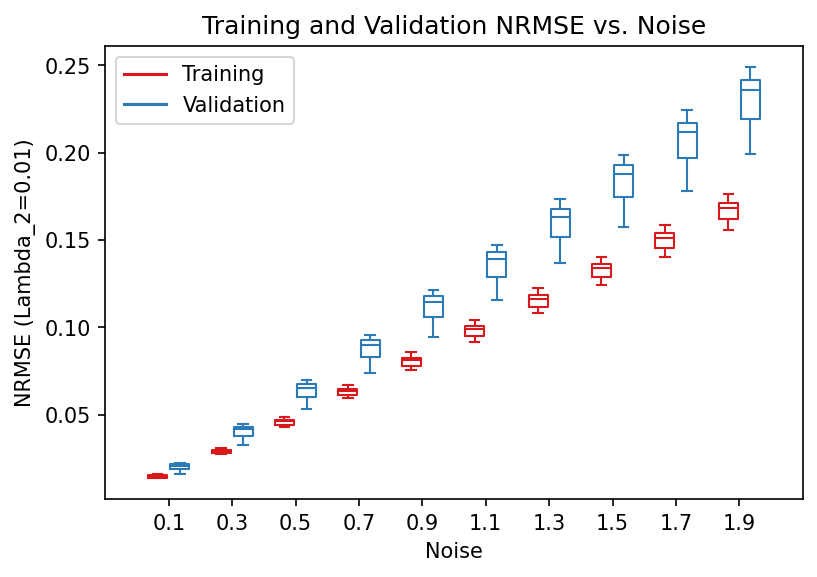

In [42]:
#Plotting the results

plt.figure(dpi=150)

ticks = np.round(noise_set,1) #ticks for noise values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('Noise')
plt.ylabel('NRMSE (Lambda_2=0.01)')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. Noise')

plt.show()

## Observations

- For the optimal lambda_2 value, the training and validation NRMSE both increase with increasing noise in the target data. The spread in these values also increases.
- For higher noise values, the training and validation NRMSEs diverge

## 13 (n):

### Training and validation NRMSE for optimal lambda1 with noise variance

In [43]:
#Training and validation NRMSE obtained using gradient descent with noise variance for optimal lambda_1

#we will fix the number of samples to 600
samples=600

#we will fix the number of dimensions
dim=100

#we will generate a weight vector for creating the target data 't' 
np.random.seed(51)
weights= np.random.randn(dim+1) #including bias

#set a maximum iteration limit for the gradient descent function
max_iter=5000

#set a step size for gradient descent
eta=0.01

#set a minimum bound for change of NRMSE
min_change_NRMSE= 1e-6

#set the L1 regularization value to the optimal value
lambda1= 0.01

#initialize empty lists to store NRMSE data
NRMSE_train=[]
NRMSE_validate=[]

#noise values to loop over
noise_set= np.arange(0.1,2.1,0.2)


for noise in noise_set:
    #loop over noise values in steps of 2
    
    #initialize empty lists for storing data for each random seed for a given noise value
    temp_train=[]
    temp_validate=[]
    
    for rand_seed in range(11,21):
        #loop over different random seeds
        #generate a data matrix using the previously made function and split into training and validation sets

        X= data_matrix(samples, dim, rand_seed) #call the function to generate data matrix

        X_train= X[:int(0.7*samples)] #Use first 70% of samples for training
        X_validate= X[int(0.7*samples):] #Use the remaining for validation

        #generate target data
        t= target_data(X, weights[1:], weights[0], noise)

        #split the target data into training and validation sets
        t_train= t[:int(0.7*samples)] #Use first 70% for training
        t_validate= t[int(0.7*samples):] #Use the remaining for validation

        #calculate maximum likelihood weights using pseudo-inverse, corresponding linear regression, and MSE for the training data
        w_train, train_NRMSE = gradient_descent(X_train, t_train, eta, max_iter, min_change_NRMSE, lambda_1=lambda1) #lambda_2 =0 by default

        #calculate linear regression for validation data using w_train and calculate MSE
        y_validate= lin_reg(X_validate, w_train[1:], w_train[0])
        mse_validate= MSE(y_validate,t_validate)
        validate_NRMSE= np.sqrt(mse_validate)/np.std(t_validate) #normalize MSE

        #append the NRMSE to temporary lists corresponding to each noise value
        temp_train.append(train_NRMSE)
        temp_validate.append(validate_NRMSE)
        
        
    #append the list of NRMSE and nearly zero weights for different random seeds to a list of lists containing data for different noise values
    NRMSE_train.append(temp_train)
    NRMSE_validate.append(temp_validate)
    

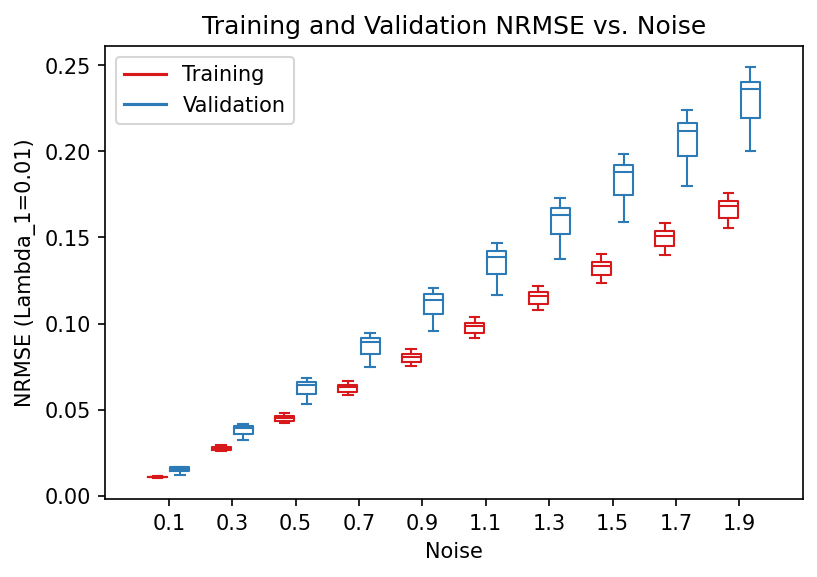

In [44]:
#Plotting the results

plt.figure(dpi=150)

ticks = np.round(noise_set,1) #ticks for noise values on the x-axis

#generate boxplot
NRMSE_train_plot= plt.boxplot(NRMSE_train, positions=np.array(np.arange(len(NRMSE_train)))*2.0-0.35,
                               widths=0.6)
NRMSE_validate_plot= plt.boxplot(NRMSE_validate, positions=np.array(np.arange(len(NRMSE_validate)))*2.0+0.35,
                               widths=0.6)

# each plot returns a dictionary, use plt.setp()
# function to assign the color code
# for all properties of the box plot of particular group
# use the below function to set color for particular group,
# by iterating over all properties of the box plot
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    plt.legend()
    
#setting colors for each groups
define_box_properties(NRMSE_train_plot, '#D7191C', 'Training')
define_box_properties(NRMSE_validate_plot, '#2C7BB6', 'Validation')

plt.xlabel('Noise')
plt.ylabel('NRMSE (Lambda_1=0.01)')
 
# set the x label values
plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
 
# set the limit for x axis
plt.xlim(-2, len(ticks)*2)
 
#set the title
plt.title('Training and Validation NRMSE vs. Noise')

plt.show()

## Observations

- For the optimal lambda_1 value, the training and validation NRMSE both increase with increasing noise in the target data. The spread in these values also increases.
- For higher noise values, the training and validation NRMSEs diverge
- The increase in NRMSE for both optimal lambda_1 and lambda_2 are comparable with increase in noise variance, this is because the regularization weights for both are negligible implyiong regularization has a negligible effect.

## (14) Overall learning points:

- Was able to connect the abstract topics- math and theory of linear regression taught in class to the practical implementation through coding, through this assignment.
- Was able to get a better sense of the matrix operations and dimensions of the data involved by coding it out and calculating the required quantities.
- Was able to see the tremendous improvement in performance in terms of the number of dimensions that can be handled in the gradient descent method as compared to the pseudo inverse method and was able to see how the algorithm trades complexity of operations for time required to perform computations by grinding through the loops.
- Was able to more or less see all the expected trends of how the NRMSE and the difference between NRMSEs of training and validation data changes with changing the hyperparameters of the model in question 13. Was able to get a sense of what these variable values should be to get the optimum output.
- Was able to get an intuition of the effect of adding regularization to the loss function and how they drive the weights closer to zero as the lambda's are increased
- By following the instructions, I was able to internalize good coding practices such as sufficient commenting, modularizing operations, defining functions for repeated operations, and adding text blocks before and after code blocks to stimulate critical thinking

## (15)

# References:
1. https://www.cs.princeton.edu/courses/archive/spr07/cos424/scribe_notes/0403.pdf 
1. https://www.geeksforgeeks.org/how-to-create-boxplots-by-group-in-matplotlib/ 
1. https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet
1. https://www.w3schools.com and https://www.geeksforgeeks.org (for general information about numpy inbuilt functions)

I would like to thank Harshda Saxena (Roll no: 190260021) for insightful discussions regarding trends in question number 13
